<a href="https://colab.research.google.com/github/Aditi2512Gupta/Aditi-Gupta/blob/main/Water_Supply.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== WATER SUPPLY OPTIMIZATION RESULTS ===
House H1: Distance=4.87, Demand=13.57, Allocated Flow=10.31, Pressure=39.96
House H2: Distance=3.19, Demand=17.57, Allocated Flow=13.34, Pressure=41.49
House H3: Distance=4.89, Demand=25.15, Allocated Flow=19.10, Pressure=31.32
House H4: Distance=3.86, Demand=12.35, Allocated Flow=9.38, Pressure=42.76
House H5: Distance=3.79, Demand=26.99, Allocated Flow=20.50, Pressure=34.46
House H6: Distance=1.86, Demand=29.63, Allocated Flow=22.50, Pressure=41.63
House H7: Distance=4.91, Demand=11.6, Allocated Flow=8.81, Pressure=41.35
House H8: Distance=1.02, Demand=21.14, Allocated Flow=16.06, Pressure=46.72


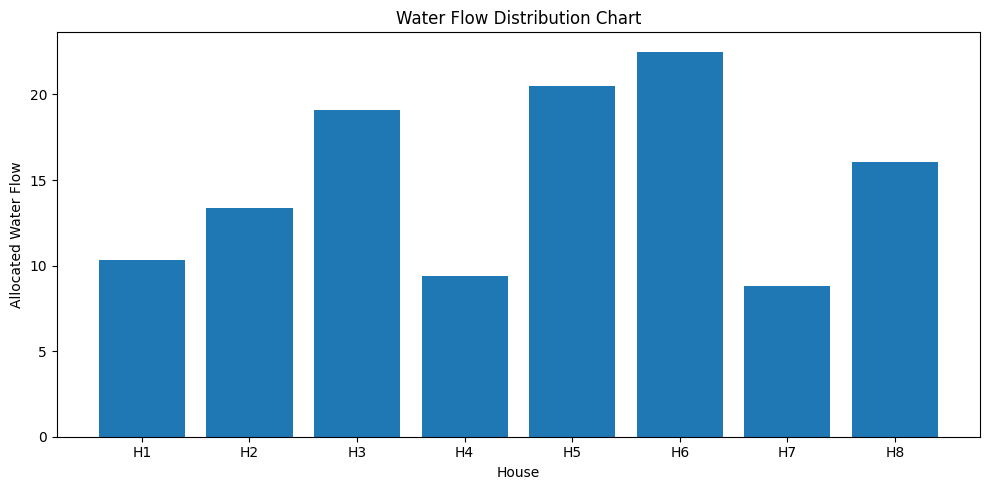

In [1]:
# -------------------------------
# SMART CITY AGENTS – WATER SUPPLY OPTIMIZER
# Agents manage water flow to houses using constraint satisfaction
# -------------------------------

import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# PARAMETERS
# -------------------------------
num_houses = 8
total_supply = 120          # Total water available
base_pressure = 50          # Base pressure at source
min_pressure = 20           # Minimum pressure required
k = 0.2                     # Pressure drop factor

np.random.seed(4)

# Random distances (pipe lengths)
distances = np.round(np.random.uniform(1.0, 5.0, size=num_houses), 2)

# Random demands for each house
demands = np.round(np.random.uniform(8, 30, size=num_houses), 2)

# Initial flow allocation = demand
flows = demands.copy()

# -------------------------------
# FUNCTION – Calculate Pressure
# -------------------------------
def pressure(flows):
    return base_pressure - k * distances * flows


# -------------------------------
# CONSTRAINT SATISFACTION LOOP
# -------------------------------
for _ in range(200):

    # Constraint 1: Total supply must not exceed available water
    if flows.sum() > total_supply:
        flows *= (total_supply / flows.sum())

    # Calculate pressures
    p = pressure(flows)

    # Find houses violating minimum pressure
    low_pressure_idx = np.where(p < min_pressure)[0]

    if len(low_pressure_idx) == 0:
        break  # All constraints satisfied

    # Handle pressure constraint violations
    for i in low_pressure_idx:
        max_flow_allowed = (base_pressure - min_pressure) / (k * distances[i])
        flows[i] = min(flows[i], max_flow_allowed)


# -------------------------------
# OUTPUT RESULTS
# -------------------------------
print("\n=== WATER SUPPLY OPTIMIZATION RESULTS ===")
for i in range(num_houses):
    print(f"House H{i+1}: Distance={distances[i]}, Demand={demands[i]}, "
          f"Allocated Flow={flows[i]:.2f}, Pressure={pressure(flows)[i]:.2f}")

# -------------------------------
# BAR CHART – Water Flow Distribution
# -------------------------------
houses = [f"H{i+1}" for i in range(num_houses)]

plt.figure(figsize=(10, 5))
plt.bar(houses, flows)
plt.xlabel("House")
plt.ylabel("Allocated Water Flow")
plt.title("Water Flow Distribution Chart")
plt.tight_layout()
plt.show()
